In [3]:
from train_model import *

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
models = {
    '0409_env6_3res_1_3_5': '1_3_5',
    '0409_env6_1res_1': '1',
    '0409_env6_1res_3': '3',    
    '0409_env6_1res_5': '5',
    # '0405_env16_3res': '1_5_16',
    # '0410_env16_1res_1': '1',
    # '0410_env16_1res_5': '5',
    # '0409_env16_1res': '16',
    # '0410_env16_1res_16_v2': '16',
    # '0410_env32_1res': '32'
}
checkpoint = 'best_val_auc' 

auc_df = pd.concat([
    pd.read_csv(f"models/{k}/{checkpoint}_species_auc.csv").rename(columns={"auc": v}).set_index(['species','n_occ']) for k, v in models.items()
], axis=1)

auc_df

,,1_3_5,1,3,5
species,n_occ,,,,
1,2261,0.919233,0.861040,0.839072,0.918023
5,4529,0.559450,0.608538,0.556939,0.557603
10,2162,0.936916,0.941518,0.946791,0.939553
11,4508,0.673315,0.640452,0.667491,0.666467
24,4539,0.831903,0.843021,0.823102,0.821316
...,...,...,...,...,...
10028,204,0.930509,0.954315,0.905582,0.930554
10031,20,0.533548,0.172381,0.348393,0.102864
10035,110,0.463512,0.389619,0.465491,0.460725


In [81]:
auc_df['delta_1_multi'] = auc_df['1'] - auc_df['1_3_5']
auc_df['delta_3_multi'] = auc_df['3'] - auc_df['1_3_5']
auc_df['delta_5_multi'] = auc_df['5'] - auc_df['1_3_5'] #auc_df['1_5_16'] 
# auc_df['delta_16_multi'] = auc_df['16'] - auc_df['1_5_16'] #auc_df['1_3_5']
auc_df['delta_sum'] = auc_df[['delta_1_multi','delta_3_multi','delta_5_multi']].sum(axis=1)
# auc_df['delta_sum'] = auc_df[['delta_1_multi','delta_5_multi','delta_16_multi']].sum(axis=1)
auc_df

,,1_3_5,1,3,5,delta_1_multi,delta_3_multi,delta_5_multi,delta_sum
species,n_occ,,,,,,,,
1,2261,0.919233,0.861040,0.839072,0.918023,-0.058193,-0.080161,-0.001210,-0.139565
5,4529,0.559450,0.608538,0.556939,0.557603,0.049088,-0.002511,-0.001847,0.044729
10,2162,0.936916,0.941518,0.946791,0.939553,0.004601,0.009875,0.002637,0.017113
11,4508,0.673315,0.640452,0.667491,0.666467,-0.032863,-0.005824,-0.006848,-0.045535
24,4539,0.831903,0.843021,0.823102,0.821316,0.011118,-0.008801,-0.010587,-0.008270
...,...,...,...,...,...,...,...,...,...
10028,204,0.930509,0.954315,0.905582,0.930554,0.023806,-0.024927,0.000045,-0.001076
10031,20,0.533548,0.172381,0.348393,0.102864,-0.361167,-0.185155,-0.430684,-0.977007
10035,110,0.463512,0.389619,0.465491,0.460725,-0.073893,0.001979,-0.002787,-0.074702


In [83]:
auc_df.std()

1_3_5            0.199697
1                0.215865
3                0.207973
5                0.205600
delta_1_multi    0.095059
delta_3_multi    0.084672
delta_5_multi    0.089868
delta_sum        0.222969
dtype: float64

In [84]:
auc_df.reset_index()[auc_df.reset_index()['n_occ'] <= 50].std(axis=0)

species          2855.564793
n_occ              14.068371
1_3_5               0.188843
1                   0.200950
3                   0.198925
5                   0.197307
delta_1_multi       0.116233
delta_3_multi       0.094408
delta_5_multi       0.105119
delta_sum           0.259138
dtype: float64

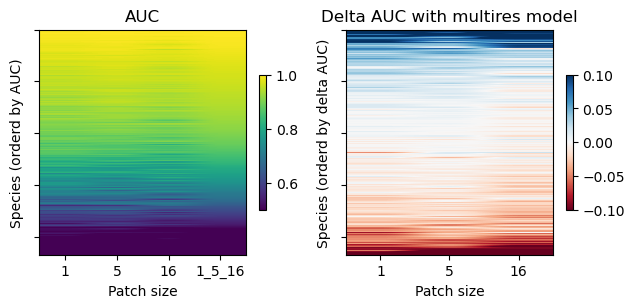

In [63]:
fig,(ax1,ax2) = plt.subplots(1,2)

# i = ax1.imshow(auc_df.sort_values('1_3_5', ascending=False)[['1','3','5','1_3_5']], aspect=0.002, vmin=0.5, vmax=1)
i = ax1.imshow(auc_df.sort_values('1_5_16', ascending=False)[['1','5','16','1_5_16']], aspect=0.002, vmin=0.5, vmax=1)
ax1.set_xticks(np.arange(4), labels=['1','5','16','1_5_16'])
ax1.set(title='AUC', xlabel='Patch size', ylabel='Species (orderd by AUC)', yticklabels=[])
fig.colorbar(i, ax=ax1, shrink=0.3)

# i2 = ax2.imshow(auc_df.sort_values('delta_sum', ascending=False)[['delta_1_multi','delta_3_multi','delta_5_multi']], aspect=0.0015, vmin=-0.1, vmax=0.1, cmap='RdBu')
i2 = ax2.imshow(auc_df.sort_values('delta_sum', ascending=False)[['delta_1_multi','delta_5_multi','delta_16_multi']], aspect=0.0015, vmin=-0.1, vmax=0.1, cmap='RdBu')
ax2.set_xticks(np.arange(3), labels=['1','5','16'])
ax2.set(title='Delta AUC with multires model', xlabel='Patch size', ylabel='Species (orderd by delta AUC)', yticklabels=[])
fig.colorbar(i2, ax=ax2, shrink=0.3)

plt.tight_layout()

In [64]:
auc_df[['1','5','16','1_5_16']].rank(axis=1, ascending=False).mean()

1         2.485741
5         2.379255
16        2.729991
1_5_16    2.405014
dtype: float64

In [65]:
(auc_df[['1','5','16','1_5_16']].rank(axis=1, ascending=False) <= 1).sum(axis=0) / auc_df.shape[0]

1         0.271849
5         0.262190
16        0.244710
1_5_16    0.211592
dtype: float64

In [57]:
(auc_df[['1','3','5','1_3_5']].rank(axis=1, ascending=False) <= 2).sum(axis=0) / auc_df.shape[0]

1        0.361546
3        0.528979
5        0.532199
1_3_5    0.575437
dtype: float64

In [189]:
(auc_df.rank(axis=1, ascending=False) <= 3).sum(axis=0) / auc_df.shape[0]

1_5_16    0.837167
1         0.713891
5         0.793008
16        0.653634
dtype: float64

In [197]:
auc_df['max_delta'] = auc_df.max(axis=1) - auc_df.min(axis=1)
auc_df

,,1_5_16,1,5,16,32,max_delta
species,n_occ,,,,,,
1,2261,0.922192,0.895741,0.842659,0.937167,0.810244,0.126922
5,4529,0.659685,0.567994,0.603804,0.620565,0.691613,0.123619
10,2162,0.950397,0.952038,0.954218,0.947787,0.981394,0.033607
11,4508,0.671987,0.638494,0.673086,0.641999,0.633749,0.039337
24,4539,0.801299,0.811953,0.809260,0.789031,0.793625,0.022923
...,...,...,...,...,...,...,...
10028,204,0.977942,0.952074,0.955974,0.975745,0.988299,0.036225
10031,20,0.208955,0.016001,0.014925,0.124513,0.373134,0.358209
10035,110,0.451192,0.384145,0.475369,0.470283,0.451563,0.091224


<AxesSubplot: xlabel='max_delta', ylabel='Count'>

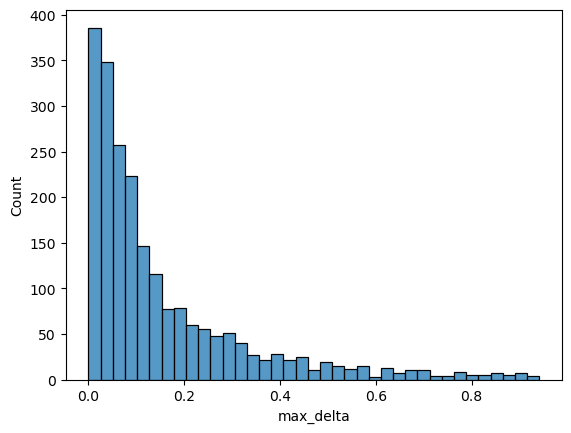

In [198]:
sns.histplot(auc_df['max_delta'])

In [158]:
(auc_df[['1_5_16', '1', '5', '16', '32']].rank(axis=1, ascending=False) == 1).sum(axis=0) / auc_df.shape[0]

1_5_16    0.170653
1         0.229531
5         0.231371
16        0.162374
32        0.197332
dtype: float64

In [159]:
(auc_df[['1_5_16', '1', '5', '16', '32']].rank(axis=1, ascending=False) <= 2).sum(axis=0) / auc_df.shape[0]

1_5_16    0.413523
1         0.442962
5         0.462741
16        0.367525
32        0.305428
dtype: float64

In [160]:
(auc_df[['1_5_16', '1', '5', '16', '32']].rank(axis=1, ascending=False) <= 3).sum(axis=0) / auc_df.shape[0]

1_5_16    0.716651
1         0.620055
5         0.677093
16        0.570377
32        0.412144
dtype: float64

In [128]:
auc_df[auc_df['max_delta'] > 0.25]

,,1_5_16,1,5,16,32,max_delta
species,n_occ,,,,,,
28,632,0.303079,0.346780,0.391018,0.109049,0.293667,0.281969
37,4539,0.805611,0.748289,0.657013,0.549004,0.612776,0.256607
130,1087,0.970149,1.000000,0.936534,0.954955,0.728385,0.271615
145,101,0.197116,0.215936,0.196376,0.331988,0.488979,0.292603
195,973,0.432753,0.537722,0.504281,0.442898,0.256929,0.280793
...,...,...,...,...,...,...,...
9974,761,0.464166,0.379992,0.656179,0.425306,0.421541,0.276187
9988,4499,0.516301,0.567735,0.474440,0.374058,0.626858,0.252800
10005,29,0.834376,0.665591,0.871940,0.859631,0.926924,0.261333


In [165]:
auc_df[auc_df['max_delta'] > 0.25][['1_5_16', '1', '5', '16', '32']].rank(axis=1, ascending=False).mean()

1_5_16    3.051980
1         2.811881
5         3.118812
16        3.094059
32        2.923267
dtype: float64

In [142]:
auc_df[auc_df['max_delta'] > 0.25][['1_5_16', '1', '5', '16', '32']].max(axis=1).mean()

0.7466925420251131

In [90]:
tmp = pd.melt(auc_df.reset_index()[0:10], id_vars=['species','n_occ'], var_name='patch_size', value_name='AUC').sort_values('n_occ')
tmp

,species,n_occ,patch_size,AUC
29,55,631,5,0.981622
49,55,631,16_v2,0.988616
39,55,631,16_v1,0.977653
19,55,631,1,0.991643
9,55,631,1_5_16,0.987809
59,55,631,32,0.983034
55,28,632,32,0.293667
45,28,632,16_v2,0.109049
15,28,632,1,0.346780
35,28,632,16_v1,0.353234


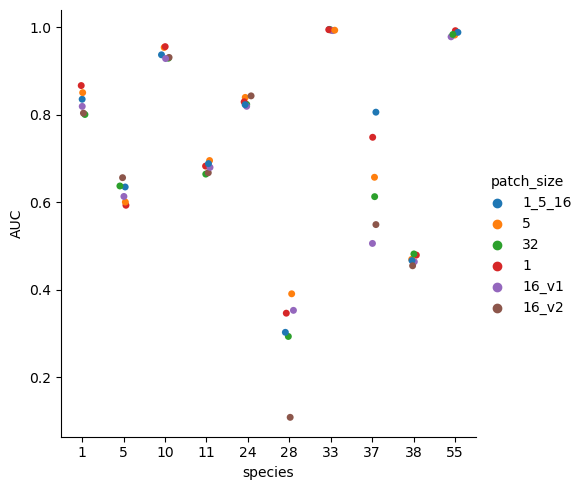

In [91]:
sns.catplot(tmp, x='species', y='AUC', hue='patch_size')

In [57]:
models

{'0410_env16_1res_1': '1',
 '0410_env16_1res_5': '5',
 '0409_env16_1res': '16_v1',
 '0410_env16_1res_16_v2': '16_v2',
 '0405_env16_3res': '1_5_16',
 '0410_env32_1res': '32'}

In [68]:
# auc_df['delta_resnet_notpre_wl_128_32'] = auc_df['resnet_notpre_128x128_wl'] - auc_df['resnet_notpre_32x32_wl']
# auc_df['delta_cnn_wl_128_32'] = auc_df['cnn_128x128_wl'] - auc_df['cnn_32x32_wl']
# auc_df['delta_resnet_notpre_an_128_32'] = auc_df['resnet_notpre_128x128_an'] - auc_df['resnet_notpre_32x32_an']
# auc_df 

ref = list(models.values())[0]
for m in list(models.values())[1:]:
    auc_df[f"delta_{m}_{ref}"] = auc_df[m]-auc_df[ref]
auc_df

,,1_5_16,1,5,16_v1,16_v2,32,delta_1_1_5_16,delta_5_1_5_16,delta_16_v1_1_5_16,delta_16_v2_1_5_16,delta_32_1_5_16
species,n_occ,,,,,,,,,,,
1,2261,0.835127,0.866375,0.850191,0.818852,0.803430,0.800336,0.031249,0.015064,-0.016274,-0.031697,-0.034790
5,4529,0.634843,0.593153,0.600446,0.613243,0.656106,0.637152,-0.041689,-0.034396,-0.021600,0.021263,0.002309
10,2162,0.936540,0.955240,0.953384,0.927983,0.930593,0.928791,0.018700,0.016844,-0.008556,-0.005946,-0.007749
11,4508,0.688218,0.682569,0.695235,0.679583,0.667377,0.664242,-0.005648,0.007017,-0.008634,-0.020841,-0.023975
24,4539,0.822715,0.829261,0.839331,0.819030,0.842826,0.823337,0.006546,0.016616,-0.003685,0.020111,0.000622
...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,0.966824,0.951805,0.956960,0.928447,0.924412,0.979601,-0.015019,-0.009863,-0.038377,-0.042412,0.012777
10031,20,0.692349,0.038591,0.295549,0.714401,0.735646,0.558827,-0.653758,-0.396800,0.022052,0.043297,-0.133522
10035,110,0.415606,0.439277,0.426578,0.541490,0.479184,0.403530,0.023671,0.010972,0.125884,0.063578,-0.012076


In [69]:
auc_df.median(axis=0)

1_5_16                0.888966
1                     0.880862
5                     0.885289
16_v1                 0.882062
16_v2                 0.882225
32                    0.873013
delta_1_1_5_16       -0.000285
delta_5_1_5_16        0.000193
delta_16_v1_1_5_16   -0.003115
delta_16_v2_1_5_16   -0.001851
delta_32_1_5_16      -0.010129
dtype: float64

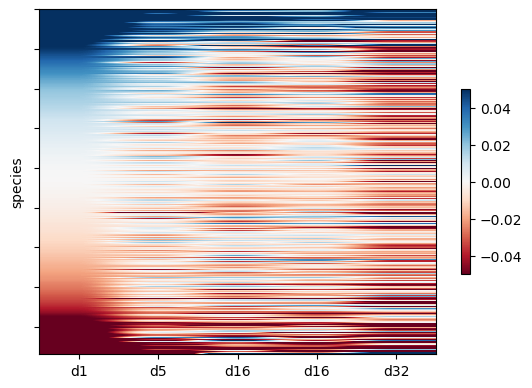

In [73]:
fig,ax = plt.subplots()
i = ax.imshow(auc_df.sort_values('delta_1_1_5_16', ascending=False)[['delta_1_1_5_16','delta_5_1_5_16','delta_16_v1_1_5_16','delta_16_v2_1_5_16','delta_32_1_5_16']], aspect=0.002, vmin=-0.05, vmax=0.05,cmap='RdBu')
ax.set_xticks(np.arange(5), labels=['d1','d5','d16','d16','d32'])
ax.set_yticklabels([])
ax.set_ylabel('species')
fig.colorbar(i, ax=ax, shrink=0.5)

In [71]:
auc_df = auc_df.reset_index()
auc_df['n_occ_cat'] = pd.cut(auc_df['n_occ'], [1, 50, 500, 3000, 4600]) #[1, 50, 500, 2000, 2500]
print(auc_df.groupby('n_occ_cat').count().species)

n_occ_cat
(1, 50]         422
(50, 500]       536
(500, 3000]     569
(3000, 4600]    601
Name: species, dtype: int64


In [72]:
auc_melt = pd.melt(auc_df.reset_index(), 
                  id_vars=['species','n_occ','n_occ_cat'], 
                  value_vars=[c for c in list(auc_df.columns) if 'delta' not in c and c not in ['species','n_occ','n_occ_cat']],
                  var_name='model', value_name='AUC')
auc_melt['patch_size'] = auc_melt['model'].apply(lambda x: x.split('_')[-2])
# auc_melt['loss'] = auc_melt['model'].apply(lambda x: x.split('_')[-1])
auc_melt['model_loss'] = auc_melt['model'].apply(lambda x: '_'.join(x.split('_')[:-2] + [x.split('_')[-1]]))
auc_melt

,species,n_occ,n_occ_cat,model,AUC,patch_size,model_loss
0,1,2261,"(500, 3000]",MLP_1x1,0.856288,MLP,1x1
1,5,4529,"(3000, 4600]",MLP_1x1,0.521196,MLP,1x1
2,10,2162,"(500, 3000]",MLP_1x1,0.927714,MLP,1x1
3,11,4508,"(3000, 4600]",MLP_1x1,0.683837,MLP,1x1
4,24,4539,"(3000, 4600]",MLP_1x1,0.835091,MLP,1x1
...,...,...,...,...,...,...,...
10865,10028,204,"(50, 500]",CNN_32x32,0.957633,CNN,32x32
10866,10031,20,"(1, 50]",CNN_32x32,0.422482,CNN,32x32
10867,10035,110,"(50, 500]",CNN_32x32,0.490366,CNN,32x32
10868,10038,10,"(1, 50]",CNN_32x32,0.975662,CNN,32x32


In [86]:
tmp = auc_melt.groupby(['species', 'model_loss']).AUC.max().reset_index().groupby('model_loss').AUC.mean()
tmp

model_loss
cnn_wl              0.819650
resnet_notpre_an    0.827754
resnet_notpre_wl    0.820726
Name: AUC, dtype: float64

In [37]:
delta_auc_melt = pd.melt(auc_df.reset_index(), 
                  id_vars=['species','n_occ','n_occ_cat'], 
                  value_vars=[c for c in list(auc_df.columns) if 'delta' in c and c not in ['species','n_occ','n_occ_cat']],
                  var_name='models', value_name='delta_AUC')
delta_auc_melt

,species,n_occ,n_occ_cat,models,delta_AUC
0,1,2261,"(500, 3000]",delta_resnet_notpre_wl_128_32,0.135082
1,5,4529,"(3000, 4600]",delta_resnet_notpre_wl_128_32,-0.001106
2,10,2162,"(500, 3000]",delta_resnet_notpre_wl_128_32,-0.019373
3,11,4508,"(3000, 4600]",delta_resnet_notpre_wl_128_32,-0.036344
4,24,4539,"(3000, 4600]",delta_resnet_notpre_wl_128_32,0.058256
...,...,...,...,...,...
6517,10028,204,"(50, 500]",delta_resnet_notpre_an_128_32,-0.005380
6518,10031,20,"(1, 50]",delta_resnet_notpre_an_128_32,0.089149
6519,10035,110,"(50, 500]",delta_resnet_notpre_an_128_32,-0.001322
6520,10038,10,"(1, 50]",delta_resnet_notpre_an_128_32,-0.054995


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MLP_1x1'),
  Text(1, 0, 'MLP_5x5'),
  Text(2, 0, 'MLP_16x16'),
  Text(3, 0, 'CNN_16x16'),
  Text(4, 0, 'CNN_32x32')])

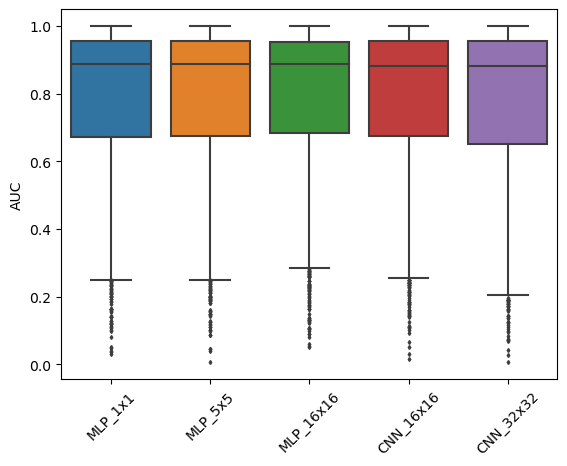

In [74]:
g = sns.boxplot(auc_melt, x='model', y='AUC', fliersize=2)
g.set(xlabel=None)
plt.xticks(rotation=45)

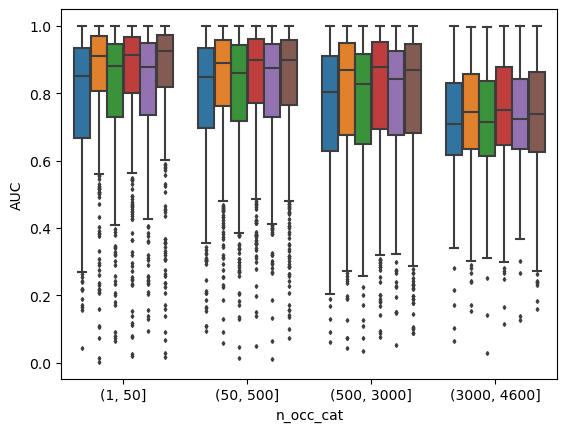

In [41]:
sns.boxplot(auc_melt, hue='model', x='n_occ_cat', y='AUC', fliersize=2)
plt.legend([],[], frameon=False)

(array([0, 1, 2]),
 [Text(0, 0, 'delta_resnet_notpre_wl_128_32'),
  Text(1, 0, 'delta_cnn_wl_128_32'),
  Text(2, 0, 'delta_resnet_notpre_an_128_32')])

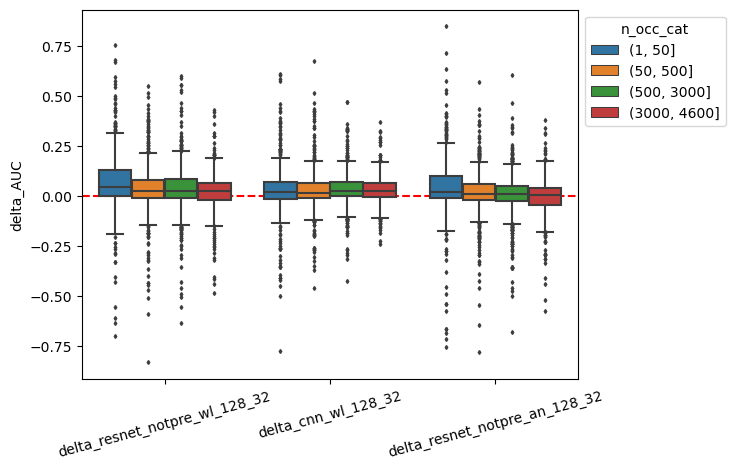

In [67]:
g = sns.boxplot(delta_auc_melt, hue='n_occ_cat', x='models', y='delta_AUC', fliersize=2)#, dodge = True, s=3)
g.set(xlabel=None)
g.axhline(0, linestyle='--', color='r', zorder=0)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=15)

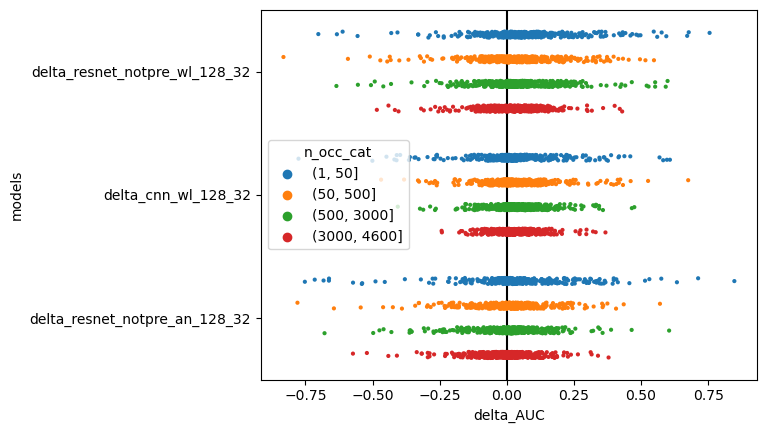

In [103]:
g = sns.stripplot(delta_auc_melt, hue='n_occ_cat', x='delta_AUC', y='models', dodge = True, s=3)
g.axvline(0, color='k')



In [4]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"DEVICE: {dev}")
    
train_data, val_data, model, optimizer, multires = setup_model(
    model_setup, train_occ_path, random_bg_path, val_occ_path,
    n_max_low_occ, embed_shape, learning_rate, seed
)
model = model.to(dev)

DEVICE: cuda

Making patch providers with size=1x1, flatten=True for covariates:
	 - data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/
	 - data/full_data/EnvironmentalRasters/Soilgrids/
	 - data/full_data/EnvironmentalRasters/LandCover/LandCover_MODIS_Terra-Aqua_500m.tif

Making patch providers with size=128x128, flatten=False for covariates:
	 - data/full_data/SatelliteImages/

Making dataset for training occurrences
nb items = 2856818
nb species = 2174
nb of species with less than 50 occurrences = 468
input shape: [(41,), (4, 128, 128)]

Making dataset for validation occurrences
nb items = 7438
nb species = 2174
nb of species with less than 50 occurrences = 1822


In [5]:
print(f"\nLoading model from checkpoint {run_name}")
checkpoint = torch.load(f"models/{run_name}/{checkpoint_to_load}.pth")
print(checkpoint['epoch'], checkpoint['val_auc'])
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict']) 


Loading model from checkpoint 0219_MultiScale_env_1_sat_128x128
24 0.7871325572527568


In [8]:
ll_weights = model.fc.weight.data.detach().cpu().numpy()

In [13]:
ll_weights.shape

(2174, 1024)

In [25]:
w = ll_weights[0,:]
w = np.abs(w)
w = w / w.sum()
w[:512].sum()

0.48805836

In [27]:
w[512:].sum()

0.51194173

In [56]:
df = pd.DataFrame(train_data.species_counts, columns=['n_occ']).reset_index().rename(columns={'index':'species'})
df['auc'] = [roc_auc_score(labels[:,i], y_pred[:,i]) for i in range(labels.shape[1])]
df

,species,n_occ,auc
0,1,1125,0.329298
1,5,2243,0.431015
2,10,1085,0.885215
3,11,2284,0.713295
4,24,2315,0.521655
...,...,...,...
2134,10028,93,0.829455
2135,10031,9,0.943122
2136,10035,60,0.563982
2137,10038,6,0.959796


In [58]:
df.auc.median()

0.638885149788367

In [10]:
model.eval()
labels_list, y_pred_list = [], []

for inputs, _, labels in tqdm(val_loader):    
    if multires:
        inputsA = inputs[0].to(torch.float32).to(dev)
        inputsB = inputs[1].to(torch.float32).to(dev)
        y_pred = torch.sigmoid(model(inputsA, inputsB))
    else:
        inputs = inputs[0].to(torch.float32).to(dev)
        y_pred = torch.sigmoid(model(inputs))
    
    y_pred_list.append(y_pred.cpu().detach().numpy())
    labels_list.append(labels)

labels = np.concatenate(labels_list)
y_pred = np.concatenate(y_pred_list)

100%|██████████| 59/59 [00:46<00:00,  1.27it/s]


In [11]:
auc = roc_auc_score(labels, y_pred)
print('AUC = ', auc)

AUC =  0.7956252848286665


In [15]:
df = pd.DataFrame(train_data.species_counts, columns=['n_occ']).reset_index().rename(columns={'index':'species'})
df['auc'] = [roc_auc_score(labels[:,i], y_pred[:,i]) for i in range(labels.shape[1])]
df

,species,n_occ,auc
0,1,2261,0.958821
1,5,4529,0.687385
2,10,2162,0.940468
3,11,4508,0.666231
4,24,4539,0.829301
...,...,...,...
2169,10028,204,0.935665
2170,10031,20,0.062122
2171,10035,110,0.537498
2172,10038,10,0.989781


In [17]:
df.to_csv(f"models/{run_name}/last_auc_per_species.csv", index=False)

In [18]:
print(df.groupby('num_presences_cat').count())

                   index  n_occ  auc
num_presences_cat                   
(1, 50]              575    575  575
(50, 250]            469    469  469
(250, 1000]          459    459  459
(1000, 1250]         502    502  502


In [20]:
def compute_f1(labels, pred):
    tn, fp, fn, tp = confusion_matrix(labels, pred).ravel()
    f1 = tp / (tp + ((fp+fn)/2))
    return f1

In [29]:
f1_scores = {}
for thresh in np.arange(0.05, 1, 0.05):
    try:
        y_pred_bin = binarize(y_pred, threshold=thresh)
        f1_list = [compute_f1(labels[i,:], y_pred_bin[i,:]) for i in range(labels.shape[0])]
        f1_mean = np.mean(f1_list)
        print(thresh, '.... f1 = ', f1_mean)
        f1_scores[thresh] = f1_mean
    except:
        f1_scores[thresh] = np.nan 
        
max_f1 = np.nanmax(list(f1_scores.values()))
threshold = [k for k,v in f1_scores.items() if v == max_f1][0]


0.05 .... f1 =  0.010707814469055004
0.1 .... f1 =  0.01111779857855658
0.15000000000000002 .... f1 =  0.01207326461291827
0.2 .... f1 =  0.013238900564891642
0.25 .... f1 =  0.014407193227791666
0.3 .... f1 =  0.015592485476829043
0.35000000000000003 .... f1 =  0.016749635184104918
0.4 .... f1 =  0.017870066897042187
0.45 .... f1 =  0.01895140510300799
0.5 .... f1 =  0.019844175832729904
0.55 .... f1 =  0.020916620992410654
0.6000000000000001 .... f1 =  0.020605439638756697
0.6500000000000001 .... f1 =  0.01604780727739449
0.7000000000000001 .... f1 =  0.010592128302088511
0.7500000000000001 .... f1 =  0.009572105460100249
0.8 .... f1 =  0.009368207974469347
0.8500000000000001 .... f1 =  0.007342346804093446
0.9000000000000001 .... f1 =  0.0036175935365548896


IndexError: list index out of range

In [37]:
max_f1 = np.nanmax(list(f1_scores.values()))
threshold = [k for k,v in f1_scores.items() if v == max_f1][0]

Text(0.5, 0.98, '0208_MLP_env_1_weighted_loss_1')

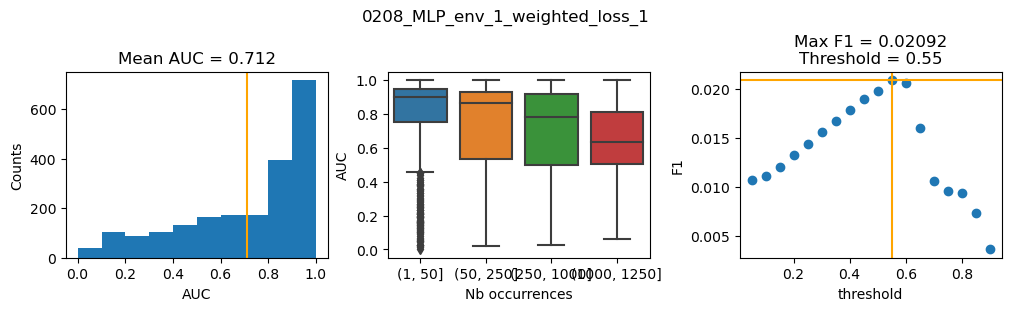

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, layout='constrained', figsize=(10,3))

mean1 = df.auc.mean()
ax1.hist(df.auc)
ax1.axvline(mean1, color='orange')
ax1.set(xlabel='AUC', ylabel='Counts', title=f"Mean AUC = {mean1:.3f}")

sns.boxplot(data=df, x="num_presences_cat", y="auc", ax=ax2)
ax2.set(xlabel='Nb occurrences', ylabel='AUC')

ax3.scatter(x=list(f1_scores.keys()), y=list(f1_scores.values()))
ax3.axhline(y=max_f1, color='orange')
ax3.axvline(x=threshold, color='orange')
ax3.set(xlabel='threshold', ylabel='F1', title=f"Max F1 = {max_f1:.5f}\nThreshold = {threshold}")

fig.suptitle(run_name)



In [57]:
mean_weights = pd.DataFrame({
    'bioclim': weights[:,:512].mean(axis=1), 'sat': weights[:,512:].mean(axis=1)
}).sort_values(['bioclim','sat'])

In [61]:
mean_weights.values.shape

(2088, 2)

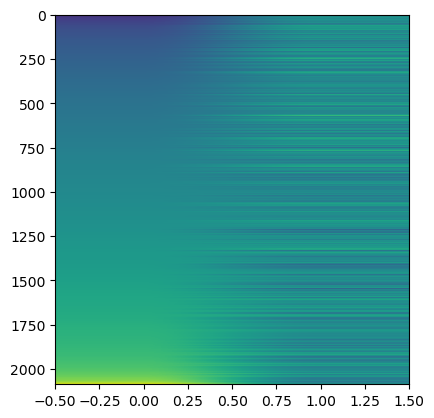

In [67]:
plt.imshow(mean_weights.values, aspect=0.001)

In [39]:
roc_auc_score(labels, y_pred)

0.7856477944925715

In [40]:
roc_auc_score(labels[:, low_occ_species_idx], y_pred[:, low_occ_species_idx])

0.8021208924074779

In [183]:
df = pd.DataFrame(train_data.species_counts, columns=['n_occ']).reset_index()
df['auc'] = [roc_auc_score(labels[:,i], y_pred[:,i]) for i in range(labels.shape[1])]
df

,index,n_occ,auc
0,1,2261,0.942233
1,5,4529,0.641626
2,10,2162,0.938100
3,11,4508,0.668044
4,24,4539,0.808725
...,...,...,...
2169,10028,204,0.913114
2170,10031,20,0.799381
2171,10035,110,0.467925
2172,10038,10,0.944332


<AxesSubplot: xlabel='n_occ', ylabel='auc'>

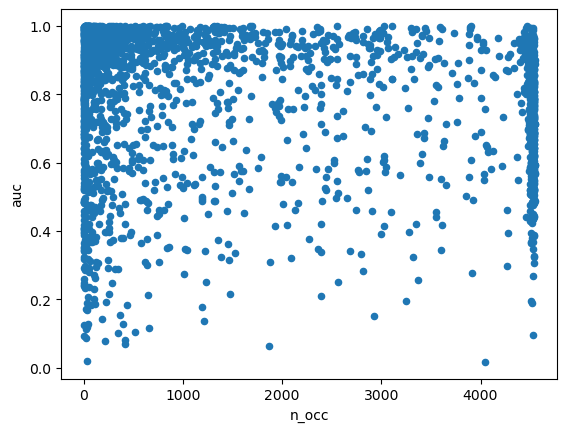

In [184]:
df.plot.scatter(x='n_occ', y='auc')

array([[<AxesSubplot: title={'center': 'auc'}>]], dtype=object)

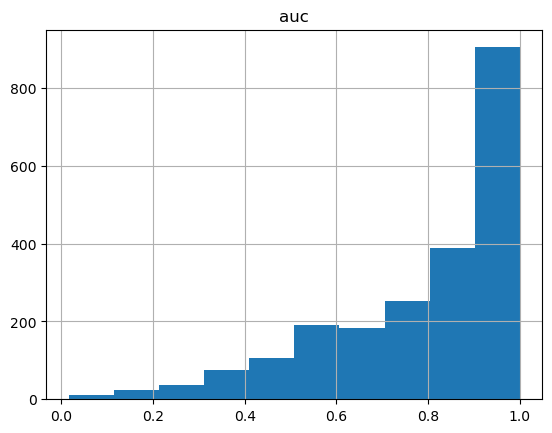

In [185]:
df.hist('auc')

In [132]:
f1_scores = {}

In [133]:
def compute_f1(labels, pred):
    tn, fp, fn, tp = confusion_matrix(labels, pred).ravel()
    f1 = tp / (tp + ((fp+fn)/2))
    return f1

In [148]:
np.arange(0.025, 1, 0.025)

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675,
       0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  ,
       0.925, 0.95 , 0.975])

In [141]:
for thresh in [0.725, 0.775, 0.825, 0.875]:#[0.1,0.2,0.3,0.4,0.5,0.6]:
    y_pred_bin = binarize(y_pred, threshold=thresh)
    f1_list = [compute_f1(labels[i,:], y_pred_bin[i,:]) for i in range(labels.shape[0])]
    f1_mean = np.mean(f1_list)
    print(thresh, '.... f1 = ', f1_mean)
    f1_scores[thresh] = f1_mean

0.725 .... f1 =  0.06117215804106441
0.775 .... f1 =  0.06264313190626879
0.825 .... f1 =  0.06173608953075929
0.875 .... f1 =  0.05883165026162659


In [142]:
dict(sorted(f1_scores.items()))

{0.1: 0.02710992021944885,
 0.2: 0.03364692441686345,
 0.3: 0.03942517650257939,
 0.4: 0.04484486907101754,
 0.5: 0.05034539790447907,
 0.6: 0.056212310325247414,
 0.7: 0.06004252688166328,
 0.725: 0.06117215804106441,
 0.75: 0.06217998207848221,
 0.775: 0.06264313190626879,
 0.8: 0.06277095937546352,
 0.825: 0.06173608953075929,
 0.85: 0.06166061019067241,
 0.875: 0.05883165026162659,
 0.9: 0.05529068820707533}

In [176]:
max_f1 = np.max(list(f1_scores.values()))
threshold = [k for k,v in f1_scores.items() if v == max_f1][0]
print('threshold', threshold)
print('max f1', max_f1)

threshold 0.8
max f1 0.06277095937546352


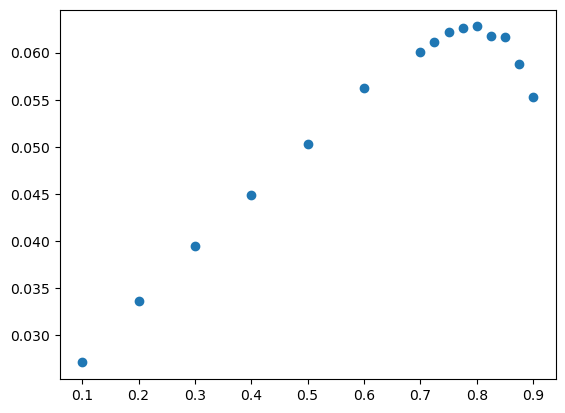

In [143]:
plt.scatter(x=f1_scores.keys(), y=f1_scores.values())

In [197]:
f1_scores

{0.1: 0.02710992021944885,
 0.2: 0.03364692441686345,
 0.3: 0.03942517650257939,
 0.4: 0.04484486907101754,
 0.5: 0.05034539790447907,
 0.6: 0.056212310325247414,
 0.7: 0.06004252688166328,
 0.8: 0.06277095937546352,
 0.9: 0.05529068820707533,
 0.75: 0.06217998207848221,
 0.85: 0.06166061019067241,
 0.725: 0.06117215804106441,
 0.775: 0.06264313190626879,
 0.825: 0.06173608953075929,
 0.875: 0.05883165026162659}

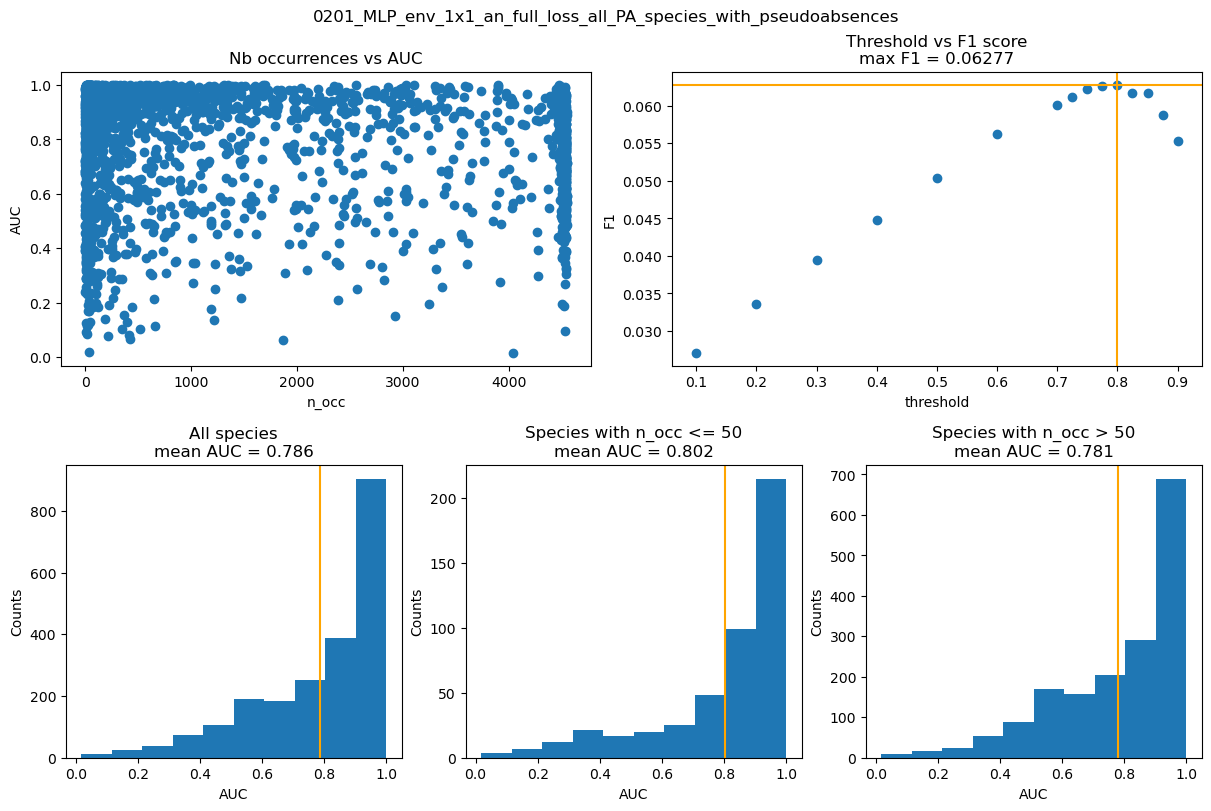

In [243]:
fig = plt.figure(layout='constrained', figsize=(12, 8))
subfigs = fig.subfigures(2, 1)

ax1, ax2 = subfigs[0].subplots(1, 2)
ax1.scatter(x=df.n_occ, y=df.auc)
ax1.set(xlabel='n_occ', ylabel='AUC', title='Nb occurrences vs AUC')

ax2.scatter(x=list(f1_scores.keys()), y=list(f1_scores.values()))
ax2.axhline(y=max_f1, color='orange')
ax2.axvline(x=threshold, color='orange')
ax2.set(xlabel='threshold', ylabel='F1', title=f"Threshold vs F1 score\nmax F1 = {max_f1:.5f}")

ax1, ax2, ax3 = subfigs[1].subplots(1, 3)
ax1.hist(df.auc)
mean1 = df.auc.mean()
ax1.axvline(mean1, color='orange')
ax1.set(xlabel='AUC', ylabel='Counts', title=f"All species\nmean AUC = {mean1:.3f}")

ax2.hist(df[df['n_occ'] <= n_max_low_occ].auc)
mean2 = df[df['n_occ'] <= n_max_low_occ].auc.mean()
ax2.axvline(mean2, color='orange')
ax2.set(xlabel='AUC', ylabel='Counts', title=f"Species with n_occ <= 50\nmean AUC = {mean2:.3f}")

ax3.hist(df[df['n_occ'] > n_max_low_occ].auc)
mean3 = df[df['n_occ'] > n_max_low_occ].auc.mean()
ax3.axvline(mean3, color='orange')
ax3.set(xlabel='AUC', ylabel='Counts', title=f"Species with n_occ > 50\nmean AUC = {mean3:.3f}")

fig.suptitle(run_name)
plt.savefig('test.png')